<center>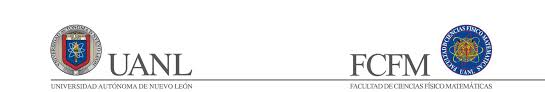  </center>



<h1>  <center>  Aprendizaje Automatizado   </center>    <h1>  

<t1>    <center>    <b> Practica 2: Modelo de Regresion (Renta de bicicletas (SEUL) </center>  </t1>

<t1>   <center>   
   <b>   Nombre  </b>    Cynthia  Selene Martínez Espinoza <b>  Matricula   </b> 1011238                            
</center>   </t1>

<h2> Carga de Librerias / funciones </h2>

In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

<h2> Carga de Datos </h2>

In [2]:
# Leer los datos de archivo csv, typed_uanl.csv con el URL
url =  "C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 2/Practica/RentasBicicletasSEUL.csv"
df = pd.read_csv(url)

<h2> Explorando  de Datos </h2>

In [3]:
# Resumen estadístico de los datos
summary_stats = df.describe()
# Verificación de valores nulos
missing_values = df.isnull().sum()

In [5]:
summary_stats, missing_values

(       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
 count        8760.000000  8760.000000      8760.000000  8760.000000   
 mean          704.602055    11.500000        12.882922    58.226256   
 std           644.997468     6.922582        11.944825    20.362413   
 min             0.000000     0.000000       -17.800000     0.000000   
 25%           191.000000     5.750000         3.500000    42.000000   
 50%           504.500000    11.500000        13.700000    57.000000   
 75%          1065.250000    17.250000        22.500000    74.000000   
 max          3556.000000    23.000000        39.400000    98.000000   
 
        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
 count       8760.000000       8760.000000                8760.000000   
 mean           1.724909       1436.825799                   4.073813   
 std            1.036300        608.298712                  13.060369   
 min            0.000000         27.000000                

In [4]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


<h2> Encontrar al mejor modelo, con Validacion Cruzada </h2>

In [5]:
# Preprocesar los datos: convertir columnas categóricas a numéricas y manejar valores faltantes si los hay
df['Seasons'] = df['Seasons'].astype('category').cat.codes
df['Holiday'] = df['Holiday'].astype('category').cat.codes
df['Functioning Day'] = df['Functioning Day'].astype('category').cat.codes

In [6]:
# Selección de características y variable objetivo
features = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
    'Visibility (10m)', 'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
    'Seasons', 'Holiday', 'Functioning Day'
]
X = df[features]
y = df['Rented Bike Count']

In [9]:
modelos = {
    'Regresion Lineal': LinearRegression(),
    'Regresion Polynomica (grado=2)': make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression()),
    'Regresion cresta': make_pipeline(StandardScaler(), Ridge()),
    'Regresion KNN': make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5)),
    'Regresion Arbol de desicion': DecisionTreeRegressor()
}

In [14]:
# Validación cruzada
resultados = {}
for nombre, modelo in modelos.items():
    r2 = cross_val_score(modelo, X, y, cv=5, scoring='r2').mean()
    resultados[nombre] = r2

# Encontrar el mejor modelo
mejor_modelo_nombre = max(resultados, key=resultados.get)
mejor_modelo = modelos[mejor_modelo_nombre]

In [16]:
# Mostrar resultados
print(f"Resultados de la Validación Cruzada (Accuracy): {resultados}")
print(f"El mejor modelo es: {Mejor_Modelo_Nombre} con una Accuracy de {resultados[Mejor_Modelo_Nombre]:.4f}")

Resultados de la Validación Cruzada:
Regresion Lineal: R^2 = -0.4594
Regresion Polynomica (grado=2): R^2 = -258872063407996648030208.0000
Regresion cresta: R^2 = -0.4590
Regresion KNN: R^2 = 0.2455
Regresion Arbol de desicion: R^2 = 0.3324


In [18]:
print(f"\nEl mejor modelo es: {mejor_modelo_nombre} con R^2 = {resultados[mejor_modelo_nombre]:.4f}")


El mejor modelo es: Regresion Arbol de desicion con R^2 = 0.3324


<h2> Entrenar mejor modelo encontrado en validacion cruzada</h2>

In [19]:
# Entrenar el mejor modelo en todo el conjunto de datos
mejor_modelo.fit(X, y)

DecisionTreeRegressor()

In [22]:
# Dividir en conjunto de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# utilizamos el mejor modelo de regresión,  árbol de decisión
modelo = DecisionTreeRegressor()

# Validación cruzada
r2_datos = cross_val_score(modelo, X_entrenamiento, y_entrenamiento, cv=5, scoring='r2')

# Entrenar el modelo en todo el conjunto de datos de entrenamiento
modelo.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeRegressor()

In [27]:
# Evaluar el modelo en el conjunto de prueba
y_proyeccion = modelo.predict(X_prueba)
prueba_r2 = r2_score(y_prueba, y_proyeccion)

# Mostrar resultados
print(f"Resultados de la Validación Cruzada (R^2): {r2_datos}")
print(f"R^2 promedio: {r2_datos.mean():.4f}")
print(f"R^2 en el conjunto de prueba: {prueba_r2:.4f}")

Resultados de la Validación Cruzada (R^2): [0.73164226 0.73095454 0.7676254  0.76933193 0.74267066]
R^2 promedio: 0.7484
R^2 en el conjunto de prueba: 0.6985


In [28]:
#Evaluar el Modelo
#Evaluamos el rendimiento del modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
# Calcular el error cuadrático medio
mse = mean_squared_error(y_prueba, y_proyeccion)
print(f"Mean Squared Error: {mse}")

# Calcular el coeficiente de determinación (R²)
#r2 = r2_score(y_test, y_pred)
print(f"R² Score: {prueba_r2}")


Mean Squared Error: 125606.54623287672
R² Score: 0.6985295080936884


<h2> Grafica </h2>

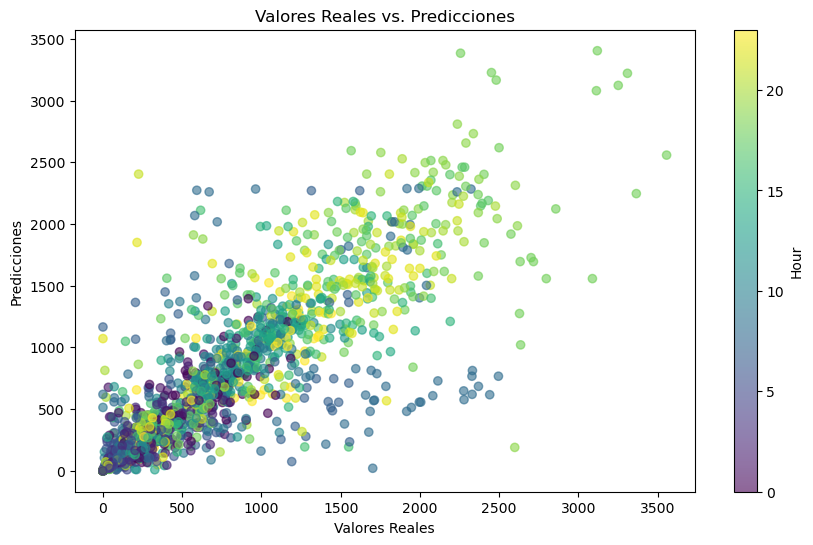

In [35]:
# Crear el gráfico de dispersión coloreando según la variable 'Hour'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_prueba, y_proyeccion, c=X_prueba['Hour'], cmap='viridis', alpha=0.6)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
# Añadir barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Hour')
# Guardar y mostrar el gráfico
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 2/Practica/GraficaDispersionRealvsPred.png")
plt.show()
plt.close()

<h2> Analisis de resultados </h2>

 <t2>   Error Cuadrático Medio (MSE): Un MSE de 125606.54 indica que, en promedio, 
las predicciones del modelo tienen un error cuadrático bastante alto. Esto sugiere que las predicciones no son muy precisas.

Coeficiente de Determinación (R²): Un R² de 0.698 Este valor indica que el modelo de árbol de decisión explica aproximadamente el 69.8% de la variabilidad en la renta de bicicletas. Esto sugiere que el modelo tiene un rendimiento razonablemente bueno, pero hay espacio para mejoras. 

La hora del día, la temperatura, la humedad y otros factores meteorológicos (como la lluvia y la nieve) son determinantes importantes en la renta de bicicletas. El modelo identifica estos factores como los más influyentes.
Impacto de las Condiciones Meteorológicas: Las condiciones meteorológicas adversas, como altas temperaturas, lluvia y nieve, tienden a reducir la demanda de bicicletas.

</t2>